In [1]:
# Import the packages

import yfinance as yf # Imports yfinance data to the Jupyter Notebook
import numpy as np # Imports numpy data into the Jupyter Notebook
import pandas as pd # Imports pandas into the Jypter Notebook

In [17]:
# Question 1
# Download the daily data (from 1/March/2022 to 1/March/2023) for theAmazon.com, Inc. 
# (AMZN) and the Tesla, Inc. (TSLA) from Yahoo Finance byusing yfinance package.

data = yf.download("AMZN TSLA", start="2022-03-01", end="2023-03-01")

[*********************100%***********************]  2 of 2 completed


In [18]:
data.tail() # Shows only the end of the data of the stocks

Adj Close                  Close                   High  \
                 AMZN        TSLA       AMZN        TSLA       AMZN   
Date                                                                  
2023-02-22  95.790001  200.860001  95.790001  200.860001  97.010002   
2023-02-23  95.820000  202.070007  95.820000  202.070007  96.430000   
2023-02-24  93.500000  196.880005  93.500000  196.880005  94.139999   
2023-02-27  93.760002  207.630005  93.760002  207.630005  94.779999   
2023-02-28  94.230003  205.710007  94.230003  205.710007  94.690002   

                              Low                   Open              \
                  TSLA       AMZN        TSLA       AMZN        TSLA   
Date                                                                   
2023-02-22  201.990005  94.800003  191.779999  95.099998  197.929993   
2023-02-23  205.139999  93.669998  196.330002  96.120003  203.910004   
2023-02-24  197.669998  92.320000  192.800003  93.529999  196.330002   
2023-02-27  209.419998  93.139999  201.259995  94.279999  202.029999   
2023-02-28  211.229996  92.919998  203.750000  93.139999  210.589996   

              Volume             
                AMZN       TSLA  
Date                             
2023-02-22  59534100  191828500  
2023-02-23  48467000  146360000  
2023-02-24  57053800  142228100  
2023-02-27  47470300  161028300  
2023-02-28  43959300  153144900

In [19]:
# Question 2
# Save the adjusted close price of these two stocks as a ‘pandas’ DataFrameCalled ‘ADJ’. 
# Plot the figure of these two prices.

ADJ =  data['Adj Close'] # Shows the close price for the two stocks
ADJ.info() # Gives us information about the stock, if there are any errors in the count etc.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-01 to 2023-02-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    251 non-null    float64
 1   TSLA    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

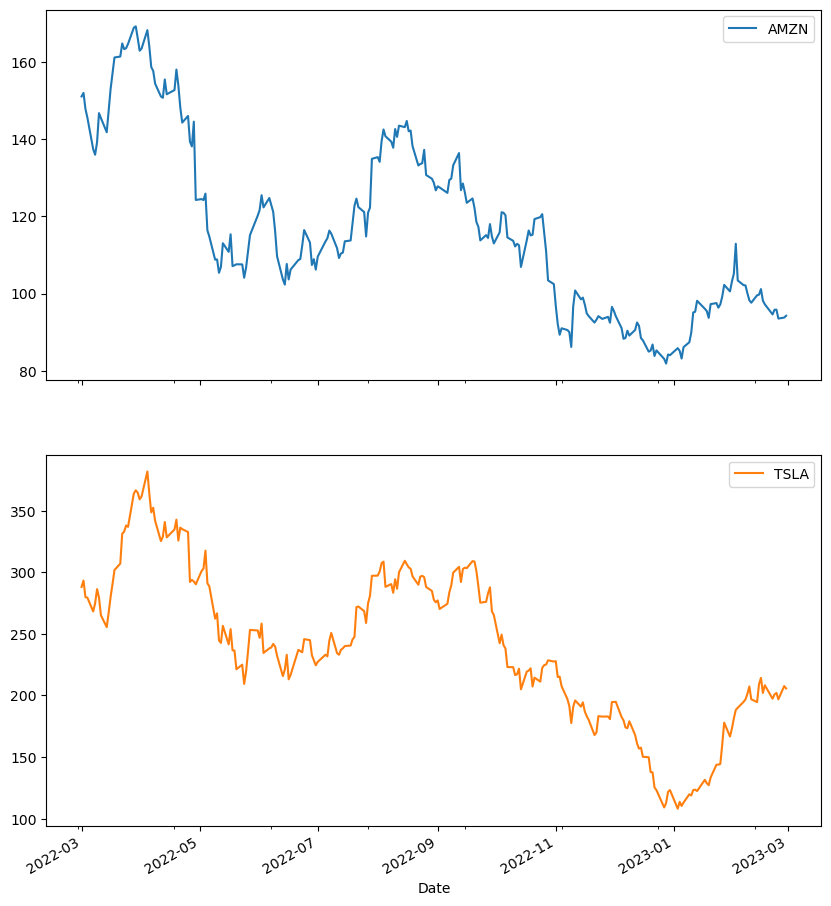

In [20]:
ADJ.plot(figsize=(10, 12), subplots=True) 

In [21]:
# Question 3
# Show the statistical description of ADJ and get the daily return of these twostocks.

ADJ.describe().round(2) # Round(2) makes sure there is two decimals

,AMZN,TSLA
count,251.00,251.00
mean,117.09,239.90
std,22.19,62.27
min,81.82,108.10
25%,98.14,196.85
50%,113.79,238.28
75%,133.25,288.93
max,169.32,381.82


In [22]:
rets = np.log(ADJ / ADJ.shift(1))
rets.head().round(4)

,AMZN,TSLA
Date,,
2022-03-01,NaN,NaN
2022-03-02,0.0060,0.0178
2022-03-03,-0.0277,-0.0472
2022-03-04,-0.0154,-0.0012
2022-03-07,-0.0579,-0.0410


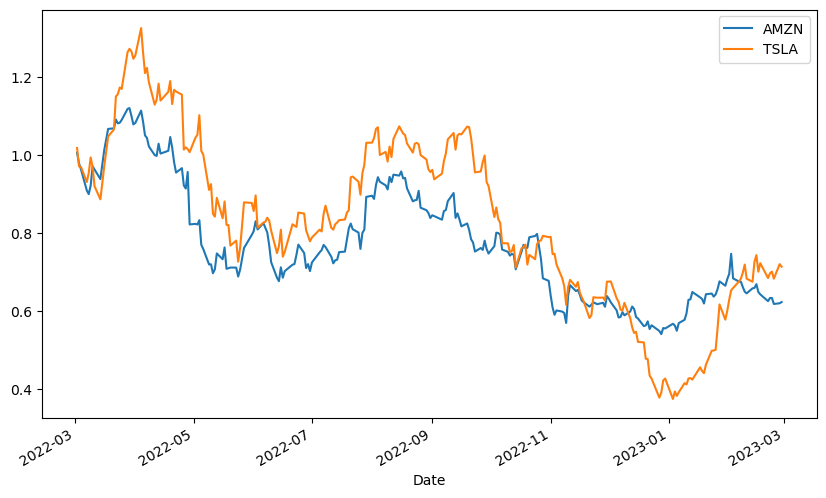

In [23]:
# Question 4
# Plot the cumsum of the log returns in one figure and compare the trends.

rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [24]:
# Question 5
# Find the SMA1 (10 days) and SAM2 (60 days) for AMZN. 
# Plot the closeprice of TSLA with SMA1, SMA2 and the position trend line.

sym = 'AMZN'
AMZN_data = pd.DataFrame(ADJ[sym]).dropna()
AMZN_data.tail()

,AMZN
Date,
2023-02-22,95.790001
2023-02-23,95.820000
2023-02-24,93.500000
2023-02-27,93.760002
2023-02-28,94.230003


In [25]:
AMZN_data['SMA1'] = ADJ[sym].rolling(window=20).mean()
AMZN_data['SMA2'] = ADJ[sym].rolling(window=60).mean()
AMZN_data[[sym, 'SMA1', 'SMA2']].tail()

,AMZN,SMA1,SMA2
Date,,,
2023-02-22,95.790001,100.504000,93.587167
2023-02-23,95.820000,100.436000,93.627333
2023-02-24,93.500000,100.150000,93.619833
2023-02-27,93.760002,99.726001,93.642167
2023-02-28,94.230003,99.410001,93.603667


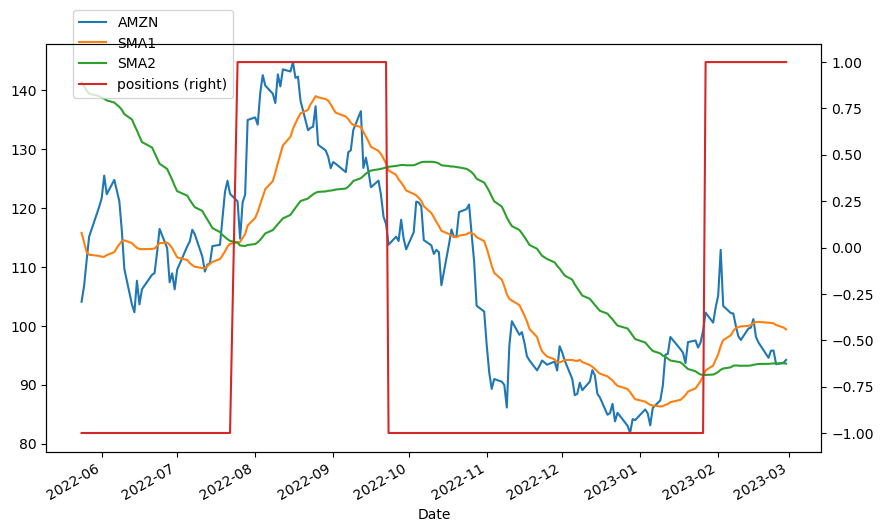

In [26]:
AMZN_data.dropna(inplace=True)
AMZN_data['positions'] = np.where(AMZN_data['SMA1'] > AMZN_data['SMA2'],1,-1)
ax = AMZN_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

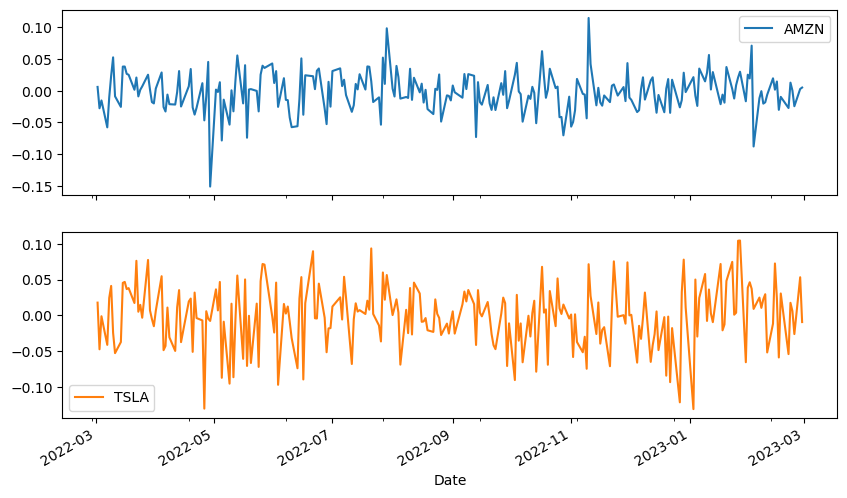

In [27]:
# Question 6
# Find the correlation between the log return of AMZN and TSLA and plot 
# the correlation coefficient by using 20 days rolling windows.

rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6))

array([[<AxesSubplot:xlabel='AMZN', ylabel='AMZN'>,
        <AxesSubplot:xlabel='TSLA', ylabel='AMZN'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='TSLA'>,
        <AxesSubplot:xlabel='TSLA', ylabel='TSLA'>]], dtype=object)

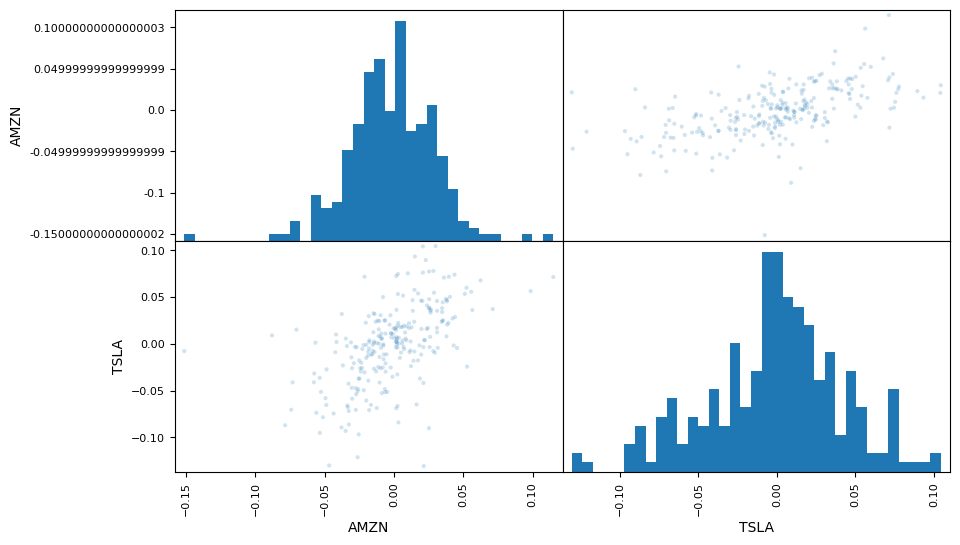

In [28]:
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

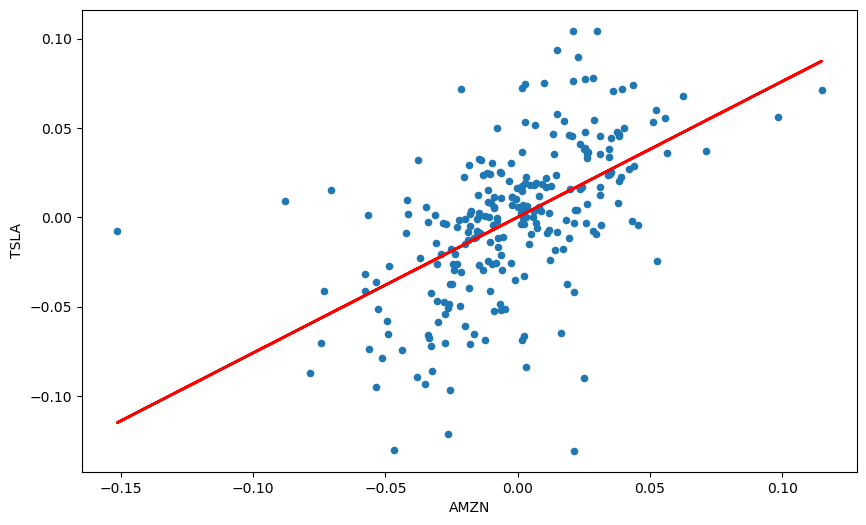

In [29]:
reg = np.polyfit(rets['AMZN'], rets['TSLA'], deg=1)
ax = rets.plot(kind='scatter', x='AMZN', y='TSLA', figsize=(10, 6))
ax.plot(rets['AMZN'], np.polyval(reg, rets['AMZN']), 'r', lw=2);

In [30]:
rets.corr()

,AMZN,TSLA
AMZN,1.000000,0.550149
TSLA,0.550149,1.000000


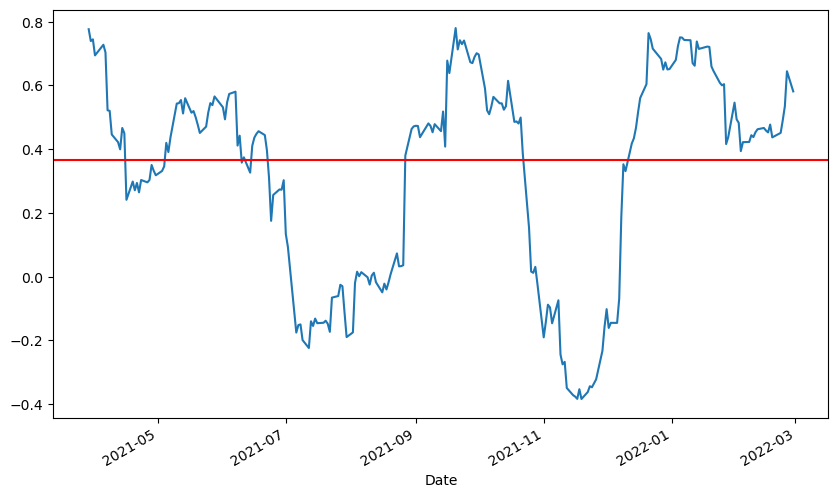

In [16]:
ax = rets['AMZN'].rolling(window=20).corr(rets['TSLA']).plot(figsize=(10, 6)) 
ax.axhline(rets.corr().iloc[0, 1], c='r');